Lab-1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7500 - loss: 0.4777
Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predictions:
Input: [0 0] => Predicted Output: [0], Actual Output: [0]
Input: [0 1] => Predicted Output: [1], Actual Output: [1]
Input: [1 0] => Predicted Output: [1], Actual Output: [1]
Input: [1 1] => Predicted Output: [1], Actual Output: [0]


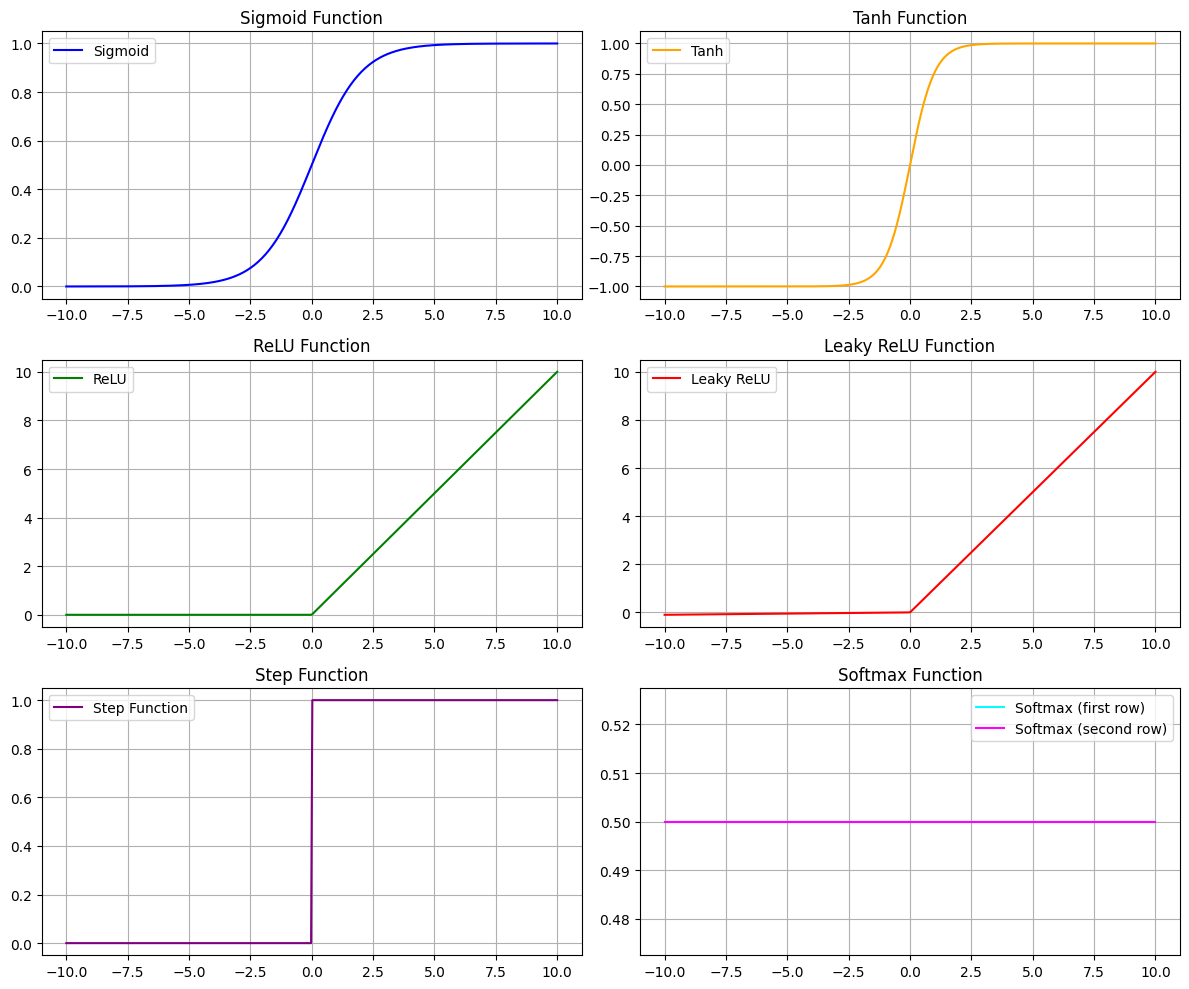

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

model = Sequential()
model.add(Dense(2, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=10000, verbose=0)

_, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy * 100:.2f}%")

predictions = model.predict(X)
predictions = np.round(predictions).astype(int)

print("Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]} => Predicted Output: {predictions[i]}, Actual Output: {y[i]}")


import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def step_function(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

x = np.linspace(-10, 10, 400)

sigmoid_vals = sigmoid(x)
tanh_vals = tanh(x)
relu_vals = relu(x)
leaky_relu_vals = leaky_relu(x)
step_vals = step_function(x)

softmax_vals = softmax(np.vstack([x, x]))

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x, sigmoid_vals, label='Sigmoid', color='blue')
plt.title('Sigmoid Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(x, tanh_vals, label='Tanh', color='orange')
plt.title('Tanh Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(x, relu_vals, label='ReLU', color='green')
plt.title('ReLU Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(x, leaky_relu_vals, label='Leaky ReLU', color='red')
plt.title('Leaky ReLU Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(x, step_vals, label='Step Function', color='purple')
plt.title('Step Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(x, softmax_vals[0], label='Softmax (first row)', color='cyan')
plt.plot(x, softmax_vals[1], label='Softmax (second row)', color='magenta')
plt.title('Softmax Function')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

Lab-6


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers


np.random.seed(42)
tf.random.set_seed(42)


In [ ]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Create a Sequential model
model = Sequential()

from tensorflow.keras.regularizers import l1_l2  # Import l1_l2
model.add(Dense(128, input_dim=784, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))  # Use l1_l2 to combine


# Add Dropout layer for regularization
model.add(Dropout(0.5))  # 50% dropout rate

# Second Dense layer with L2 regularization
model.add(Dense(64, activation='relu',
                kernel_regularizer=l2(0.01)))  # L2 regularization

# Output layer
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Use Adam optimizer with gradient clipping
optimizer = Adam(clipvalue=1.0)  # Clip gradients to a maximum value of 1.0

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Early stopping callback to stop training if validation accuracy doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)


In [ ]:
# Train the model with early stopping
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5001 - loss: 11.8692 - val_accuracy: 0.7040 - val_loss: 1.5956
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6423 - loss: 1.6938 - val_accuracy: 0.7133 - val_loss: 1.5093
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6589 - loss: 1.5990 - val_accuracy: 0.7278 - val_loss: 1.4177
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6659 - loss: 1.5615 - val_accuracy: 0.7363 - val_loss: 1.3938
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6727 - loss: 1.5299 - val_accuracy: 0.7319 - val_loss: 1.3812
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6787 - loss: 1.5038 - val_accuracy: 0.7357 - val_loss: 1.3767
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6788 - loss: 1.5041 - val_accuracy: 0.7457 - val_loss: 1.3252
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6853 - loss: 1.4710 - val_accuracy: 0

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")


313/313 - 1s - 2ms/step - accuracy: 0.7488 - loss: 1.2574
Test loss: 1.2574299573898315
Test accuracy: 0.7487999796867371


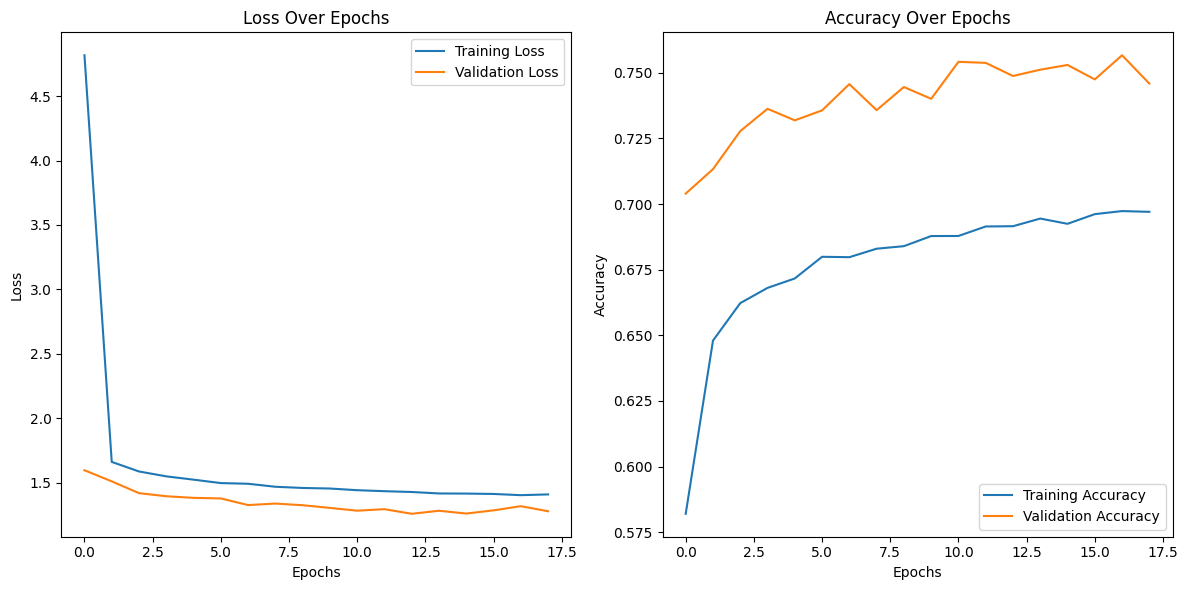

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.1003 - loss: 16.9458 - val_accuracy: 0.1000 - val_loss: 2.4288
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.0978 - loss: 2.4279 - val_accuracy: 0.1000 - val_loss: 2.4258
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.0969 - loss: 2.4257 - val_accuracy: 0.1000 - val_loss: 2.4266
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.0993 - loss: 2.4264 - val_accuracy: 0.1000 - val_loss: 2.4261
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.0988 - loss: 2.4274 - val_accuracy: 0.1000 - val_loss: 2.4289
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.0981 - loss: 2.4298 - val_accuracy: 0.1000 - val_loss: 2.4309
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.0975 - loss: 2.4300 - val_accuracy: 0.1000 - val_loss: 2.4306
313/313 - 1s - 5ms/step - accuracy: 0.1000 - loss: 2.4258
Test loss: 2.425767421722412
Te

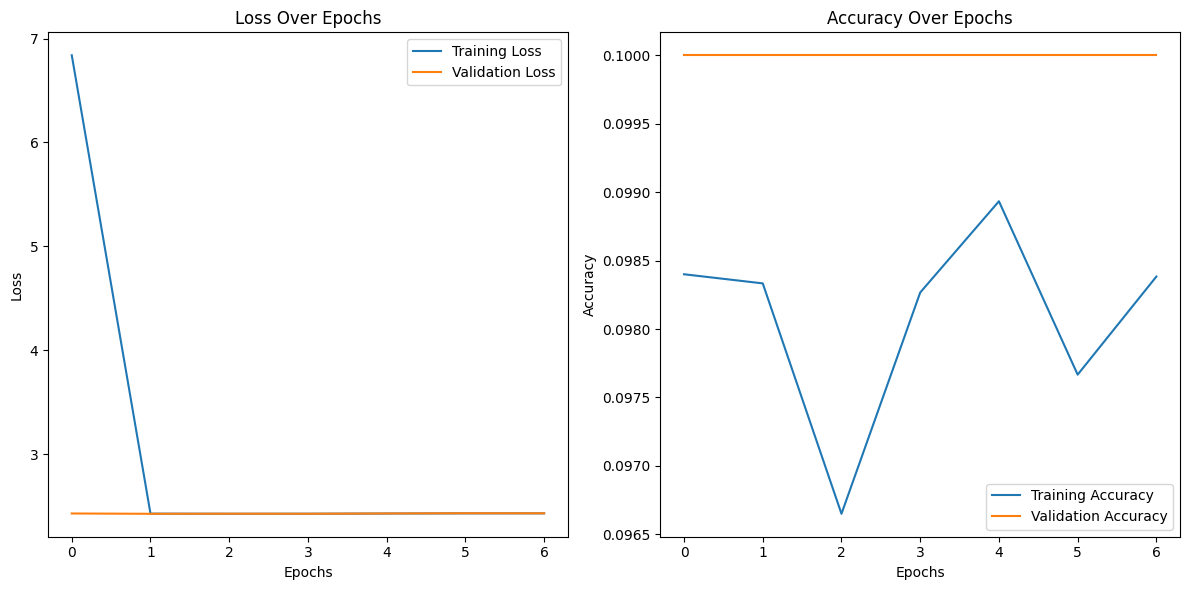

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the 28x28 images to vectors of 784 elements
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Create a Sequential model
model = Sequential()

from tensorflow.keras.regularizers import l1_l2
model.add(Dense(128, input_dim=784, activation='relu',
                kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))

# Add 15 more hidden layers
for _ in range(15):
    model.add(Dense(128, activation='relu',
                    kernel_regularizer=l2(0.01)))  # L2 regularization for each hidden layer

# Add a Dropout layer after the hidden layers
model.add(Dropout(0.5))  # 50% dropout rate

# Output layer
model.add(Dense(10, activation='softmax'))

# Use Adam optimizer with gradient clipping
optimizer = Adam(clipvalue=1.0)  # Clip gradients to a maximum value of 1.0

# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback to stop training if validation accuracy doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

# Plotting the training and validation loss and accuracy

# Training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


Epoch 1/10
375/375 - 29s - 78ms/step - accuracy: 0.6739 - loss: 0.9677 - val_accuracy: 0.8083 - val_loss: 0.5164
Epoch 2/10
375/375 - 24s - 64ms/step - accuracy: 0.8112 - loss: 0.5368 - val_accuracy: 0.8558 - val_loss: 0.4016
Epoch 3/10
375/375 - 40s - 107ms/step - accuracy: 0.8408 - loss: 0.4537 - val_accuracy: 0.8619 - val_loss: 0.3776
Epoch 4/10
375/375 - 40s - 107ms/step - accuracy: 0.8536 - loss: 0.4125 - val_accuracy: 0.8665 - val_loss: 0.3716
Epoch 5/10
375/375 - 42s - 113ms/step - accuracy: 0.8633 - loss: 0.3915 - val_accuracy: 0.8658 - val_loss: 0.3753
Epoch 6/10
375/375 - 41s - 108ms/step - accuracy: 0.8689 - loss: 0.3696 - val_accuracy: 0.8507 - val_loss: 0.4061
Epoch 7/10
375/375 - 41s - 109ms/step - accuracy: 0.8729 - loss: 0.3546 - val_accuracy: 0.8649 - val_loss: 0.3808
313/313 - 3s - 8ms/step - accuracy: 0.8573 - loss: 0.3977
Test accuracy: 0.8573


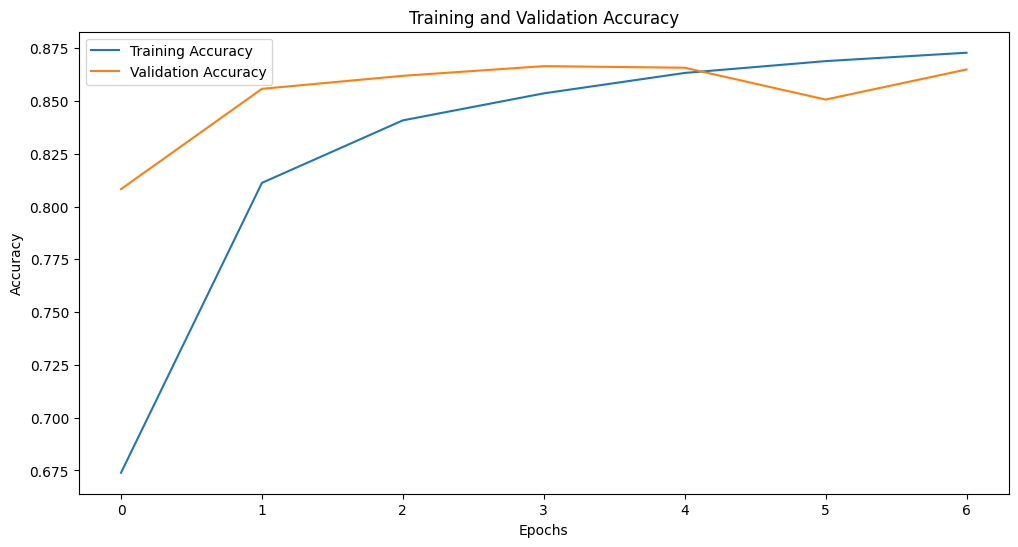

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Enable interactive plotting in Jupyter notebook
%matplotlib inline

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Flatten the images (28x28 pixels to a 784-length vector)
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model with increased complexity and batch normalization
model = Sequential()

# Input layer (input shape is 784 since each image is 28x28)
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(BatchNormalization())  # Adding Batch Normalization after the input layer

# Adding hidden layers with batch normalization and dropout
for i in range(6):  # Reduced the number of hidden layers to 6 for simplicity
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())  # Batch Normalization after each layer
    model.add(Dropout(0.4))  # Reduced dropout to 40% for better training

# Output layer (softmax for multi-class classification)
model.add(Dense(10, activation='softmax'))

# Compile the model with Adam optimizer and categorical crossentropy loss
optimizer = Adam(learning_rate=0.0005)  # Adjusted learning rate for better convergence
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback: Monitor validation loss and stop if it does not improve
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,  # Reduced patience to stop earlier
                               restore_best_weights=True)

# Train the model with 10 epochs
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,  # Use 20% of training data for validation
                    callbacks=[early_stopping],  # Include early stopping callback
                    verbose=2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
